### Getting the camera working

Here are some steps needed. First you need to enable the camera. In a terminal type `sudo raspi-config` and then use the arrow keys to select interface options and then enable the camera. A reboot is required.

Next we need to install the picamera Python modulg. In a terminal type the command

`sudo apt-get install python3-picamera`

Because the red led on the camera creates light inside the spectrometer, we can turn it off by adding this line in `/boot/config.txt` and rebooting

`disable_camera_led=1`

That's it.

In [15]:
from picamera import PiCamera
from IPython.display import Image
from time import sleep, strftime

camera = PiCamera()

camera_settings = [10, 270, 1600, 6000000000]

camera.framerate= camera_settings[0]
camera.rotation = camera_settings[1]
camera.iso = camera_settings[2]
camera.shutter_speed = camera_settings[3]
camera.zoom= (0.25, 0.25, 0.5, 0.5)

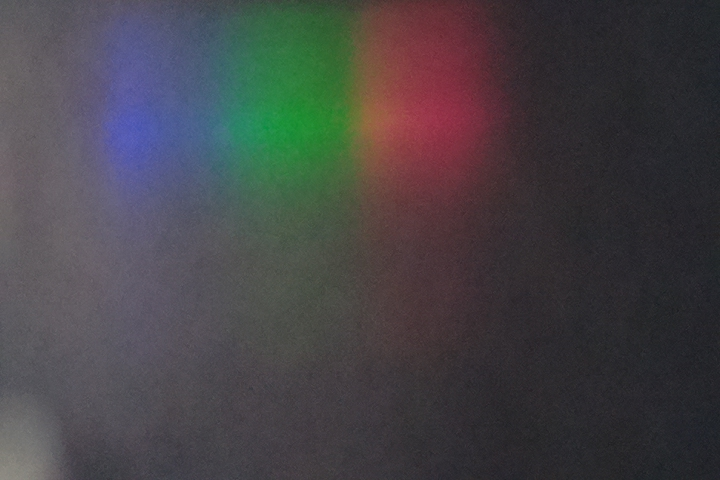

In [22]:
camera.start_preview()
sleep(2)

timestr = strftime("%Y%m%d-%H%M%S")
fname = 'Spectra/Spectrum-'+timestr+'.jpg'

camera.capture(fname)
Image(filename=fname) 

In [ ]:
camera.stop_preview()
camera.close()